In [ ]:
"""
Purpose: To investigate methods used for identifying the apical branches 
(which will be used for inhibitory excitatory classification)


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [24]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

import proofreading_utils as pru

import preprocessing_vp2 as pre

# -- For the axon classification --

import neuron_searching as ns

import skeleton_utils as sk

import numpy_utils as nu

import networkx_utils as xu

import system_utils as su

In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-19 23:53:17,586 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-19 23:53:17,905 - settings - Setting enable_python_native_blobs to True


# Importing Neuron

In [9]:
minnie.Decomposition()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134219060901,0,0.25,30.00,0,0,1,=BLOB=,11723,24809,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8309
864691134242673681,0,0.25,30.00,0,0,1,=BLOB=,10252,20204,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9755
864691134252908410,0,0.25,30.00,0,0,1,=BLOB=,10910,22764,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.2558
864691134316523453,0,0.25,30.00,0,0,1,=BLOB=,10031,22403,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5114
864691134384033872,0,0.25,30.00,0,0,1,=BLOB=,10015,20509,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8075
864691134391593458,0,0.25,30.00,0,0,1,=BLOB=,11947,25033,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.7341
864691134409056935,0,0.25,30.00,0,0,1,=BLOB=,10770,22630,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9198
864691134428609977,0,0.25,30.00,0,0,1,=BLOB=,13062,28555,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.3236
864691134441691943,0,0.25,30.00,0,0,1,=BLOB=,10681,23432,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.9167
864691134484023255,0,0.25,30.00,0,0,1,=BLOB=,21063,46992,0,0,0,0,1,0,0,None,0.0,nan,nan,nan,nan,nan,nan,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2306


In [10]:
neuron_obj = (minnie.Decomposition() & dict(segment_id=864691135753596877)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [47]:
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Splitting the Neuron

In [13]:
import proofreading_utils as pru
import time

In [22]:
nviz.plot_limb_path(neuron_obj[0],path = [49, 60])

In [20]:
nviz.plot_limb_path(neuron_obj[0],path = [11, 10, 13, 15, 17, 19, 28, 42, 49, 60, 61, 56, 55])

In [34]:
import error_detection as ed
ed.double_back_edges_path(
    neuron_obj[0],
    path_to_check= [49, 60],
    double_back_threshold = 100,
    verbose = True,
    comparison_distance=5000,
    offset=1000,
    return_all_edge_info = True,
    skip_nodes=[])

Saved object at /notebooks/Auto_Proofreading/Compartments/Apical/up_sk_flipped.pbz2
File size is 0.000429 MB
Saved object at /notebooks/Auto_Proofreading/Compartments/Apical/d_sk.pbz2
File size is 0.000448 MB
  Edge: [49 60]: curr_angle = 81.46

Total time for doubling_back = 0.2594788074493408


([], array([[49, 60]]), [81.46216147391306])

In [48]:
import networkx as nx

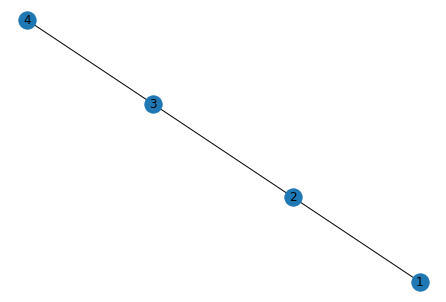

In [51]:
G = nx.from_edgelist([[1,2],
                 [2,3],
                 [3,4]])

G.remove_edges_from([[5,6],[7,8]])
nx.draw(G,with_labels=True)

In [52]:
x = [4,5,6,7,8,9]

In [53]:
np.vstack([x[:-1],x[1:]]).T

array([[4, 5],
       [5, 6],
       [6, 7],
       [7, 8],
       [8, 9]])

In [35]:
up_sk_flipped = su.decompress_pickle("up_sk_flipped.pbz2")
d_sk = su.decompress_pickle("d_sk.pbz2")

In [36]:
nviz.plot_objects(neuron_obj[0].mesh,
                 skeletons=[up_sk_flipped,d_sk])

multi_soma_limbs = [0]
multi_touch_limbs = []


 -------- Working on limb 0------------
Starting combinations to process = [[11 55]]


---- working on disconnecting 11 and 55
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [11, 10, 12, 13, 15, 17, 19, 28, 42, 49, 60, 61, 56, 55]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 0  1  3  9 10 12 13 14 15 17 19 20 27 28 40 42 47 49 50 56 57 60 61 62
 63]
Short segments to combine = [12]


-------- Removing Segments -------------
curr_short_seg_revised = 12
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[630654. 431212. 870658.]
 [631241. 431078. 870836.]]
new_stitch_point = [630947.5 431145.  870747. ]
Angles for [ 9 10 13 14] are [54.17, 40.19, 65.28, 46.0]
B

Angle between 9 and 10 = 103.36 
Angle between 9 and 13 = 106.01 
Angle between 9 and 14 = 74.04 
Angle between 10 and 13 = 29.37 
Angle between 10 and 14 = 78.15 
Angle between 13 and 14 = 93.28 
Final Matches = [[10, 13]]
matched_branches_revised = [[10, 13]]
Aligned Skeleton Parts


Original graph


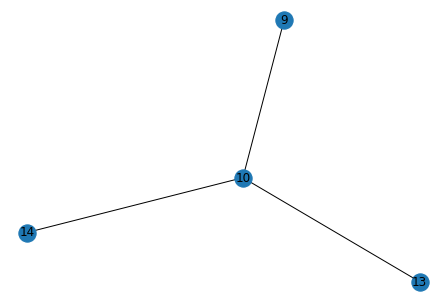

match_branches = [[10, 13]]
edges_to_delete (resolve crossover) = [[9, 10], [9, 13], [9, 14], [10, 14], [13, 14]]
edges_to_create (resolve crossover) = [[10, 13]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [11 10]: curr_angle = 69.95
  Edge: [10 13]: curr_angle = 22.86
  Edge: [13 15]: curr_angle = 51.92
  Edge: [15 17]: curr_angle = 40.25
  Edge: [17 19]: curr_angle = 57.38
  Edge: [19 28]: curr_angle = 22.45
  Edge: [28 42]: curr_angle = 21.5
  Edge: [42 49]: curr_angle = 69.9
  Edge: [49 60]: curr_angle = 86.11
  Edge: [60 61]: curr_angle = 45.1
  Edge: [61 56]: curr_angle = 52.52
  Edge: [56 55]: curr_angle = 23.12

Total time for doubling_back = 1.2134127616882324
There were 1 edges that passed doubling back threshold of 80
Winning edge [49 60] had a doubling back of 86.10797067363396
***inside resolve crossover!!!!****
coordinate_branches = [49, 60, 63]
49 = red
60 = aqua
63 = purple
Angle between 49 and 60 = 68.83 
Angle between 49 and 63 = 100.51 
Angle between 60 and 63 = 11.27 
Final Matches = [[60, 63]]
matched_branches_revised = [[60, 63]]
Original graph


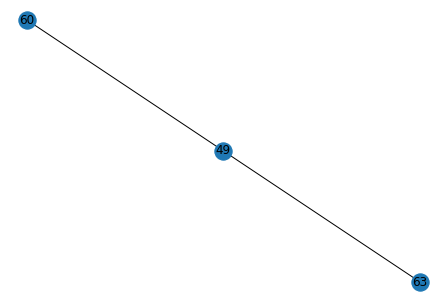

match_branches = [[60, 63]]
edges_to_delete (resolve crossover) = [[49, 60], [49, 63]]
edges_to_create (resolve crossover) = [[60, 63]]
edges_to_delete (cut_limb_network) = [array([49, 60]), array([49, 63])]
edges_to_create = [[60, 63]]
Number of connected components = 3
Comp 0 = {64, 65, 66, 67, 68, 69, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
Comp 2 = {12}
curr_limb_copy.deleted_edges = [array([49, 60]), array([49, 63])]
curr_limb_copy.created_edges = [[60, 63]]
After get best cut: cut_edges = [array([49, 60]), array([49, 63])], added_edges = [[60, 63]]
total_soma_paths_to_cut = []


suggested_cut_points = [[817787. 386065. 804001.]]




-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([64, 65, 66, 67, 68, 69, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), array([12])]
Total time for split = 39.075846433639526


In [54]:
split_time = time.time()
limb_suggestions = pru.multi_soma_split_suggestions(neuron_obj,
                                    plot_intermediates=True,
                                    plot_cut_coordinates=True)
print(f"Total time for split = {time.time() - split_time}")

In [40]:
np.any(np.array([]))

False

In [55]:
nviz.plot_split_suggestions_per_limb(neuron_obj,limb_results=limb_suggestions)



-------- Suggestions for Limb 0------

 Working on visualization type: mesh

 Working on visualization type: skeleton


# Splitting the Neuron


 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 0  1  3  9 10 12 13 14 15 17 19 20 27 28 40 42 47 49 50 56 57 60 61 62
 63]
curr_limb.deleted_edges 2=[]
curr_limb.deleted_edges 3=[]
***inside resolve crossover!!!!****
match_branches = [[10, 13]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because not help resolve the cut



***inside resolve crossover!!!!****
coordinate_branches = [49, 60, 63]
49 = red
60 = aqua
63 = purple
Angle between 49 and 60 = 68.83 
Angle between 49 and 63 = 100.51 
Angle between 60 and 63 = 11.27 
Final Matches = [[60, 63]]
matched_branches_revised = [[60, 63]]
Original graph


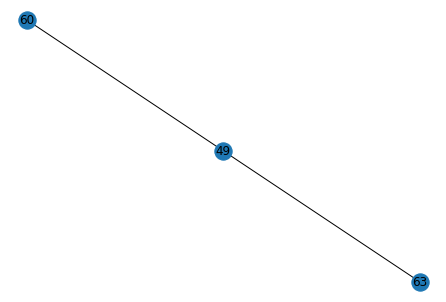

match_branches = [[60, 63]]
edges_to_delete (resolve crossover) = [[49, 60], [49, 63]]
edges_to_create (resolve crossover) = [[60, 63]]
curr_limb_copy.deleted_edges = [array([49, 60]), array([49, 63])]
curr_limb_copy.created_edges = [[60, 63]]
total_soma_paths_to_cut = []
-----------counter = 0------------
Concept graph size was 1 or less so returning original


------ Working on Soma 0 -------
local_floating_meshes = [<trimesh.Trimesh(vertices.shape=(811, 3), faces.shape=(1607, 3))>]
Processing Neuorn in minimal output mode...please wait
Total time for neuron instance creation = 8.528122186660767


------ Working on Soma 1 -------
local_floating_meshes = []
Processing Neuorn in minimal output mode...please wait
Total time for neuron instance creation = 2.267482042312622


Number of seperate neuron objects = 2

 Working on visualization type: mesh

 Working on visualization type: skeleton



 Working on visualization type: mesh

 Working on visualization type: skeleton


In [56]:
split_neuron_obj = pru.split_neuron(neuron_obj,
                                    plot_intermediates=False,
                                    plot_cut_coordinates=False)

In [57]:
split_neuron_obj

[<neuron.Neuron at 0x7f6c96707470>, <neuron.Neuron at 0x7f6c9a35c320>]

# Picking Neuron Object

In [58]:
curr_neuron_obj = split_neuron_obj[0]
curr_neuron_obj

In [59]:
nviz.visualize_neuron(curr_neuron_obj,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Algorithm

In [63]:
verbose = True
apical_soma_angle_threshold = 40

# Brainstorming algorithms that can help with removal

In [60]:
# 0) Make sure just 1 soma

soma_names = curr_neuron_obj.get_soma_node_names()

if len(soma_names)>1:
    soma_print = f"More than 1 soma: {soma_names}"
    if error_on_multi_soma:
        raise Exception(soma_print)
    else:
        print(soma_print)

soma_name = soma_names[0]

In [ ]:
"""
1) Restrict the limbs to look at by the soma angle

"""

In [66]:
nru = reload(nru)

In [128]:
viable_limbs = nru.viable_axon_limbs_by_starting_angle(curr_neuron_obj,
                                       soma_angle_threshold=apical_soma_angle_threshold,
                                       above_threshold=False,
                                       verbose=True)

if verbose:
    print(f"viable_limbs = {viable_limbs}")

functions_list = [<function soma_starting_angle at 0x7f6c9be6bae8>]
Limb L0 soma angle: 65.59 
Limb L1 soma angle: 110.26 
Limb L2 soma angle: 125.34 
Limb L3 soma angle: 102.72 
Limb L4 soma angle: 139.03 
Limb L5 soma angle: 103.82 
Limb L6 soma angle: 171.44 
Limb L7 soma angle: 140.49 
Limb L8 soma angle: 10.18 
viable_limbs = [8]


In [92]:
ret_col = nviz.visualize_neuron(curr_neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict={f"L{k}":"all" for k in viable_limbs},
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [124]:
import neuron_searching as ns

In [135]:
large_width_limb_brach_dict = ns.query_neuron(curr_neuron_obj,
                query="median_mesh_center>450",
               functions_list=["median_mesh_center"],
               function_kwargs=dict(limbs_to_process=viable_limbs),
               )

large_width_limb_brach_dict

functions_list = [<function median_mesh_center at 0x7f6ccf54e378>]


{'L8': array([11, 12, 14, 16, 19, 20, 23, 26, 32])}

In [136]:
ret_col = nviz.visualize_neuron(curr_neuron_obj,
                     visualize_type=["mesh"],
                     limb_branch_dict=large_width_limb_brach_dict,
                    mesh_whole_neuron=True,
                                mesh_color="red",
                     return_color_dict=True)


 Working on visualization type: mesh


In [ ]:
nviz.visualize_neuron

In [ ]:
curr_limb

In [99]:
viable_limbs

[8]

In [134]:
curr_limb = curr_neuron_obj[8]
curr_limb[20].width_new

{'median_mesh_center': 502.15847260129266,
 'no_spine_median_mesh_center': 497.72509425147194}

No limb name was given so using L8 because was the limb in the first key


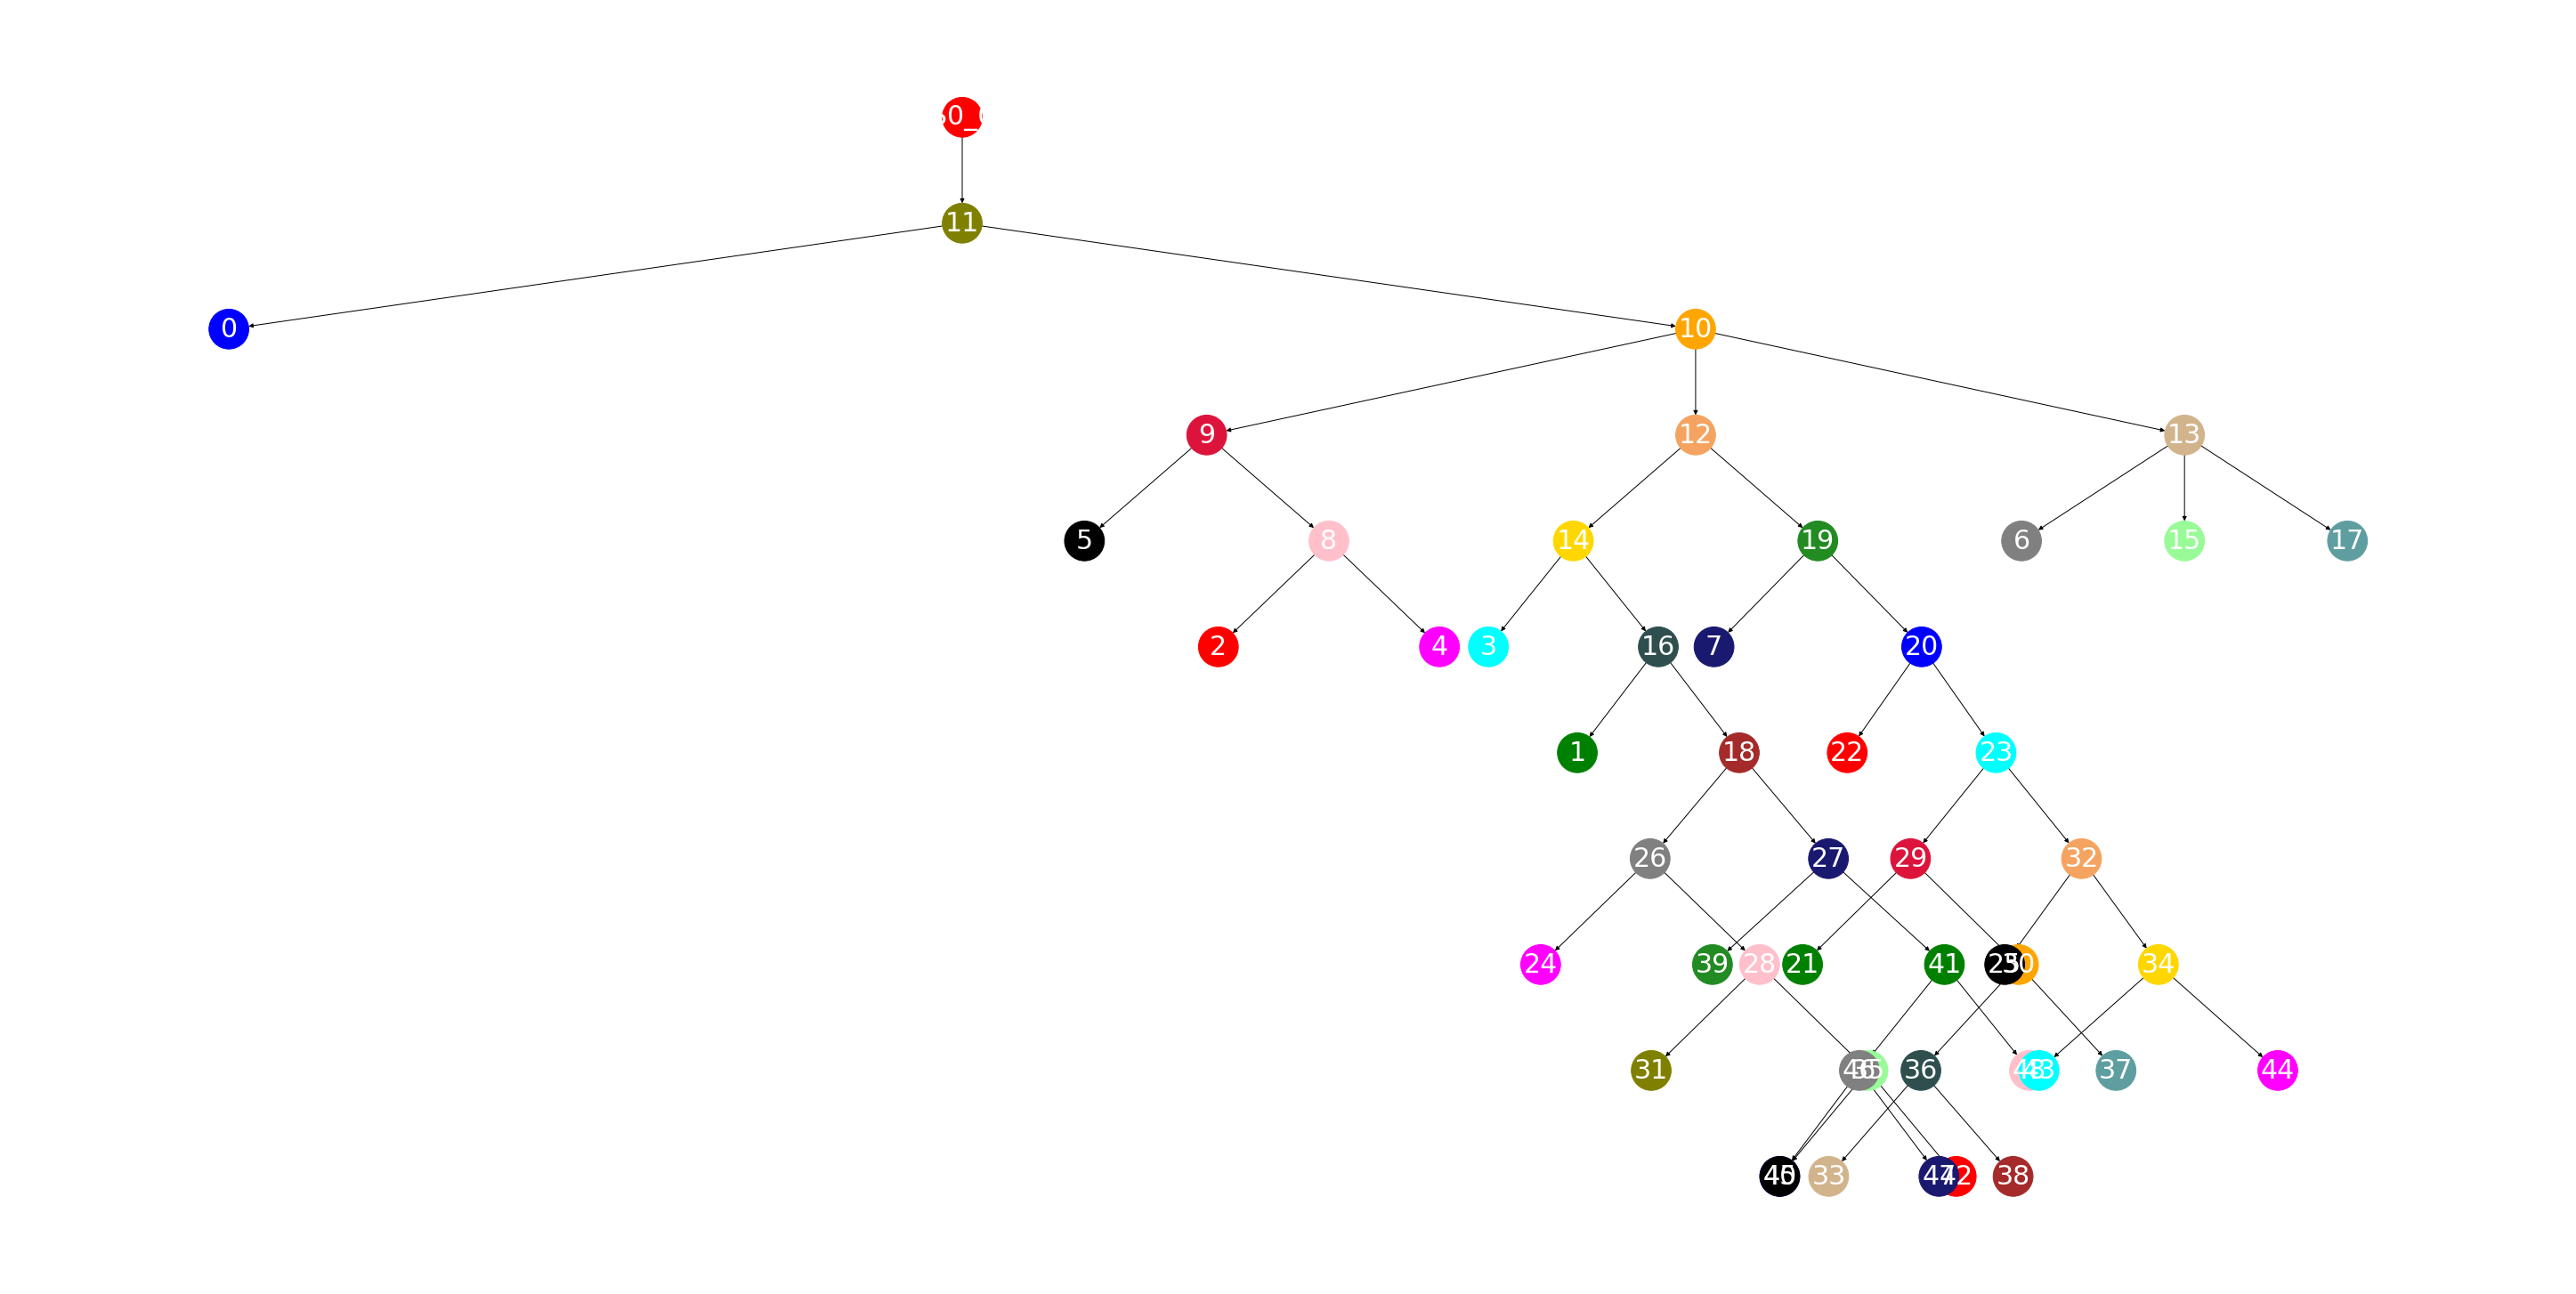

In [98]:
nviz.plot_limb_concept_network_2D(curr_neuron_obj,
                                   node_colors=ret_col)

# Part 2: Getting the Candidates for apical by distance

In [72]:
limb_idx = viable_limbs[0]
curr_limb = curr_neuron_obj[limb_idx]


array([629710.47594937, 439507.38607595, 871988.54050633])

In [74]:
import networkx_utils as xu
import skeleton_utils as sk

In [1]:
apical_check_distance = 20000
limb_gr = sk.convert_skeleton_to_graph(curr_limb.skeleton)
st_node = xu.get_graph_node_by_coordinate(limb_gr,curr_limb.current_starting_coordinate)
nodes_within_distance = xu.find_nodes_within_certain_distance_of_target_node(limb_gr,st_node,apical_check_distance)

restricted_limb_gr = limb_gr.subgraph(nodes_within_distance)
restricted_limb_sk = sk.convert_graph_to_skeleton(restricted_limb_gr)
restricted_limb_sk.shape

nviz.plot_objects(curr_limb.mesh,
                 skeletons=[restricted_limb_sk])

NameError: name 'sk' is not defined

# Pulling Down Weird Mesh

In [83]:
neuron_w = (minnie.Decomposition() & dict(segment_id=864691135644605167)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [122]:
ret_color_w = nviz.visualize_neuron(neuron_w,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all",
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [123]:
neuron_w[0][4].width_new

{'median_mesh_center': 747.4066023420928,
 'no_spine_median_mesh_center': 747.4066023420928}

No limb name was given so using L0 because was the limb in the first key


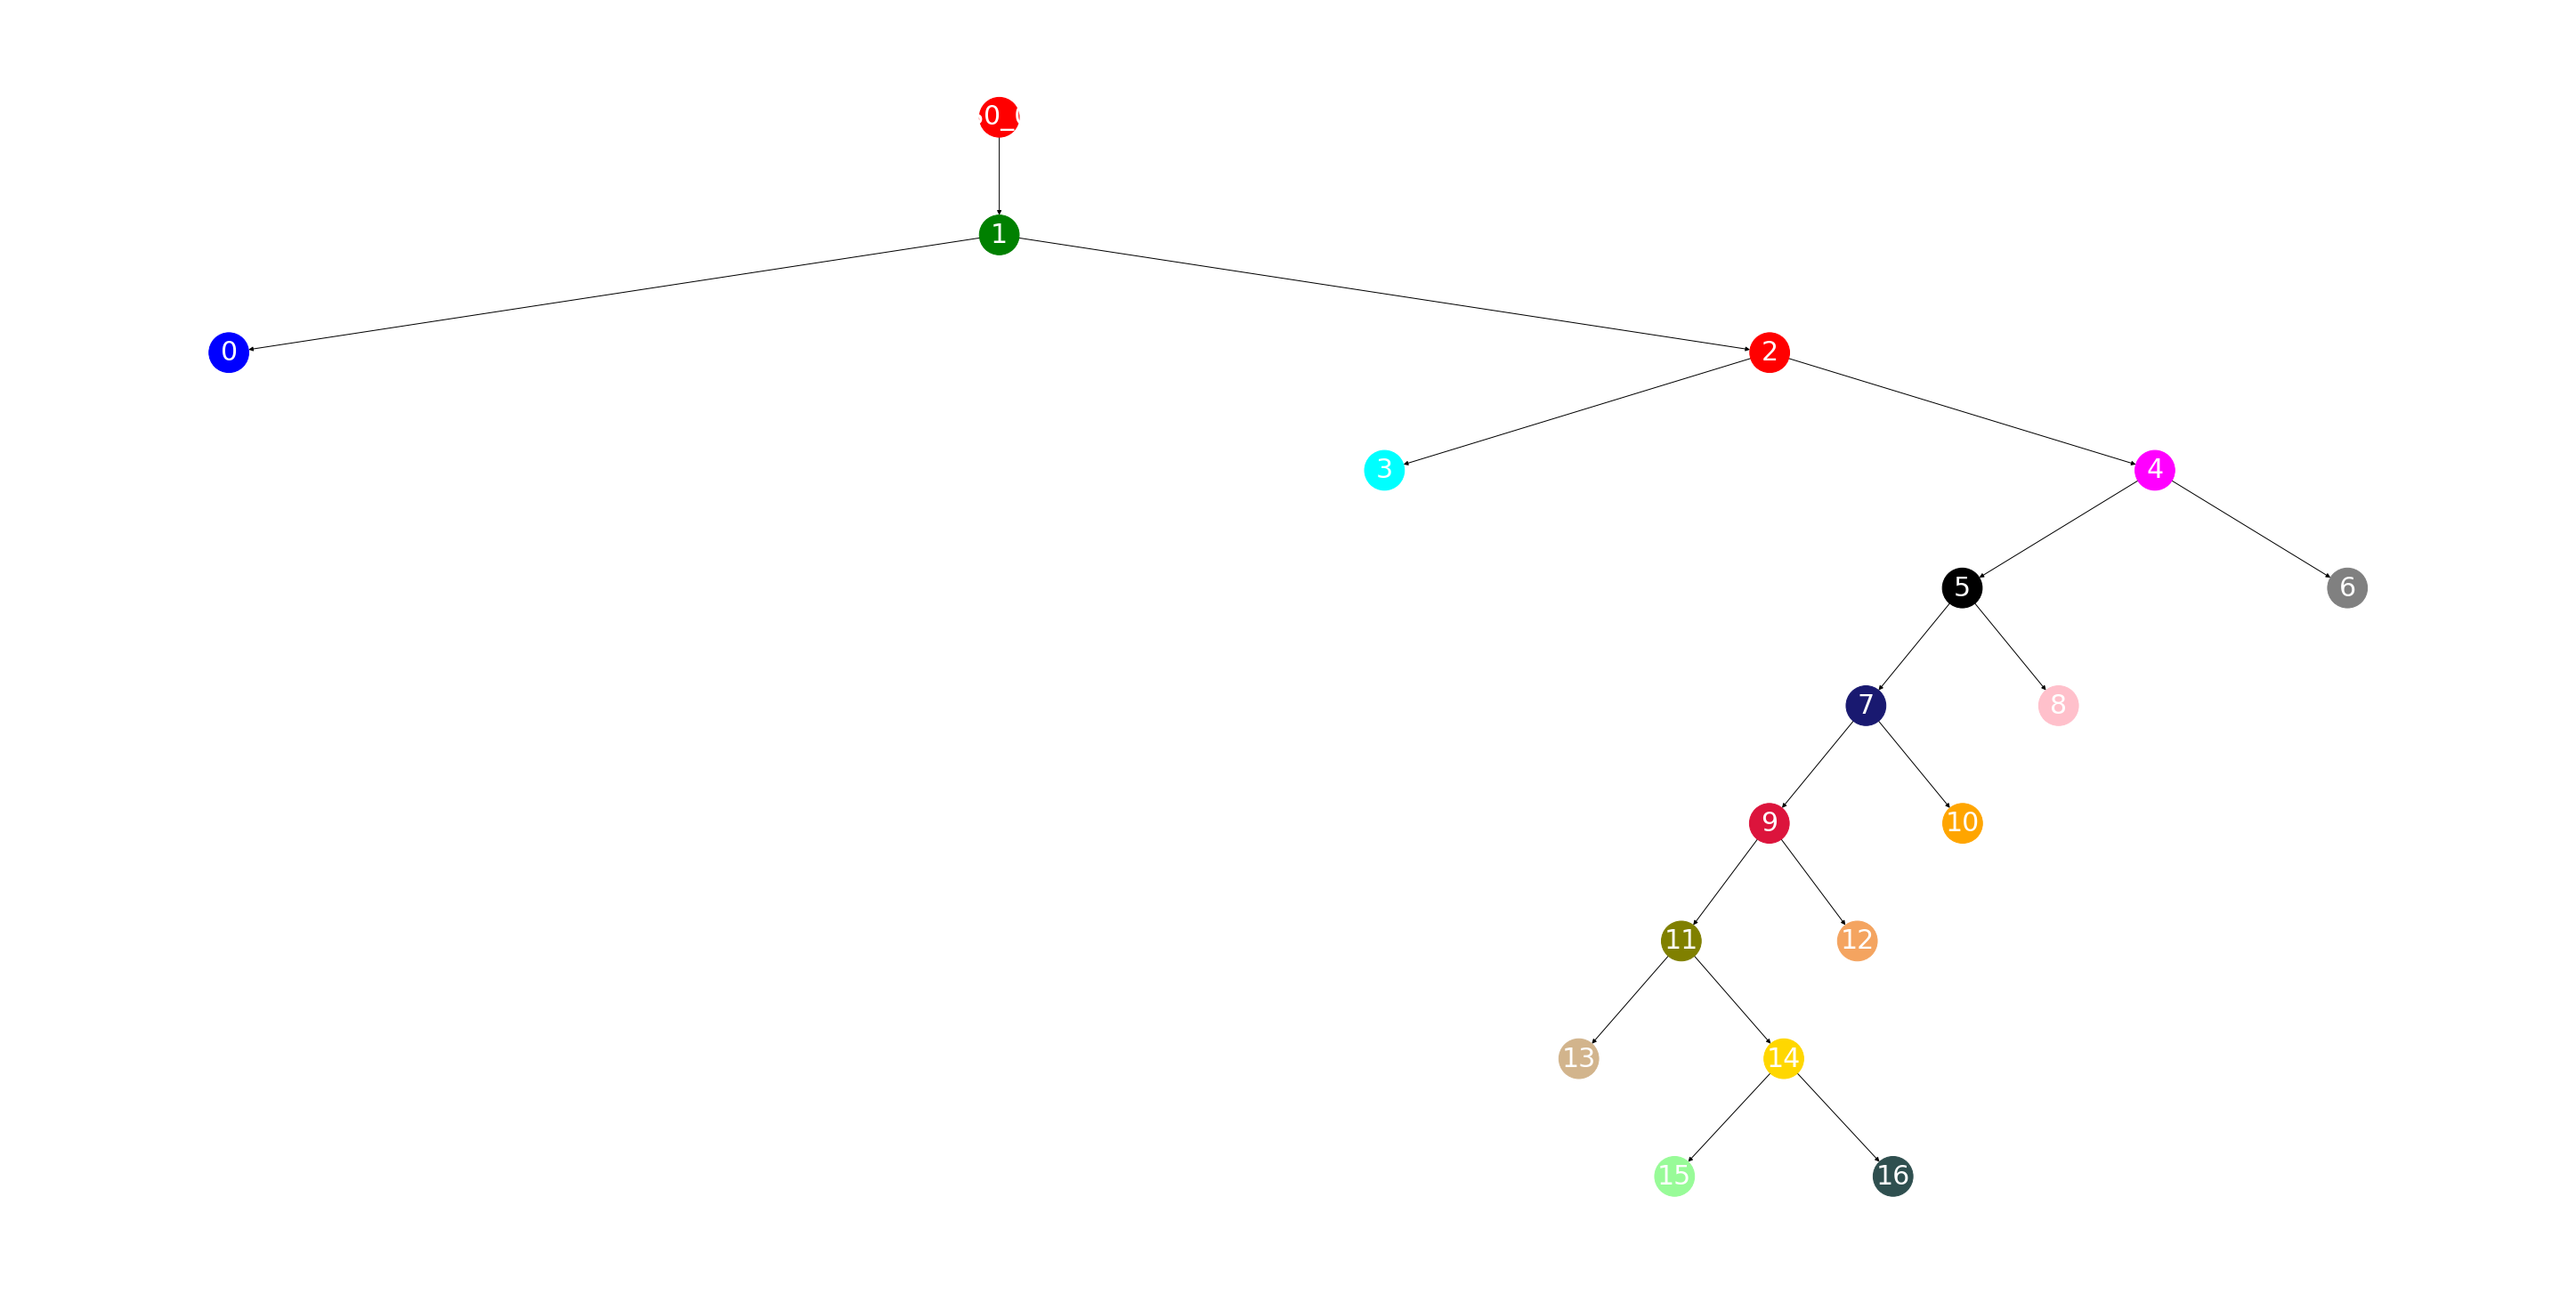

In [107]:
nviz.plot_limb_concept_network_2D(neuron_w,
                                   node_colors=ret_color_w)

In [85]:
viable_limbs = nru.viable_axon_limbs_by_starting_angle(neuron_w,
                                       soma_angle_threshold=apical_soma_angle_threshold,
                                       above_threshold=False,
                                       verbose=True)

if verbose:
    print(f"viable_limbs = {viable_limbs}")

functions_list = [<function soma_starting_angle at 0x7f6ccf54ebf8>]
Limb L0 soma angle: 31.96 
Limb L1 soma angle: 120.57 
Limb L2 soma angle: 112.62 
Limb L3 soma angle: 134.92 
Limb L4 soma angle: 100.5 
Limb L5 soma angle: 120.96 
Limb L6 soma angle: 126.82 
Limb L7 soma angle: 151.97 
viable_limbs = [0]


# Pulling Down inhibitory neurons and seeing what their soma angles are like

In [138]:
neuron_inh = (minnie.Decomposition() & dict(segment_id=864691135354903503)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [139]:
viable_limbs_inh = nru.viable_axon_limbs_by_starting_angle(neuron_inh,
                                       soma_angle_threshold=apical_soma_angle_threshold,
                                       above_threshold=False,
                                       verbose=True)

functions_list = [<function soma_starting_angle at 0x7f6c9be6bae8>]
Limb L0 soma angle: 8.56 
Limb L1 soma angle: 115.01 
Limb L2 soma angle: 131.31 


In [140]:
ret_color_inh = nviz.visualize_neuron(neuron_inh,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all",
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [141]:
ret_col_inh = nviz.visualize_neuron(neuron_inh,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict={f"L{k}":"all" for k in viable_limbs_inh},
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [143]:
large_width_limb_brach_dict = ns.query_neuron(neuron_inh,
                query="median_mesh_center>450",
               functions_list=["median_mesh_center"],
               function_kwargs=dict(limbs_to_process=viable_limbs_inh),
               )

large_width_limb_brach_dict

functions_list = [<function median_mesh_center at 0x7f6ccf54e378>]


{'L0': array([108, 130, 140, 147, 153, 154, 155, 160])}

In [121]:
neuron_inh[1][19].width_new

{'median_mesh_center': 540.227523037931,
 'no_spine_median_mesh_center': 540.227523037931}

No limb name was given so using L1 because was the limb in the first key


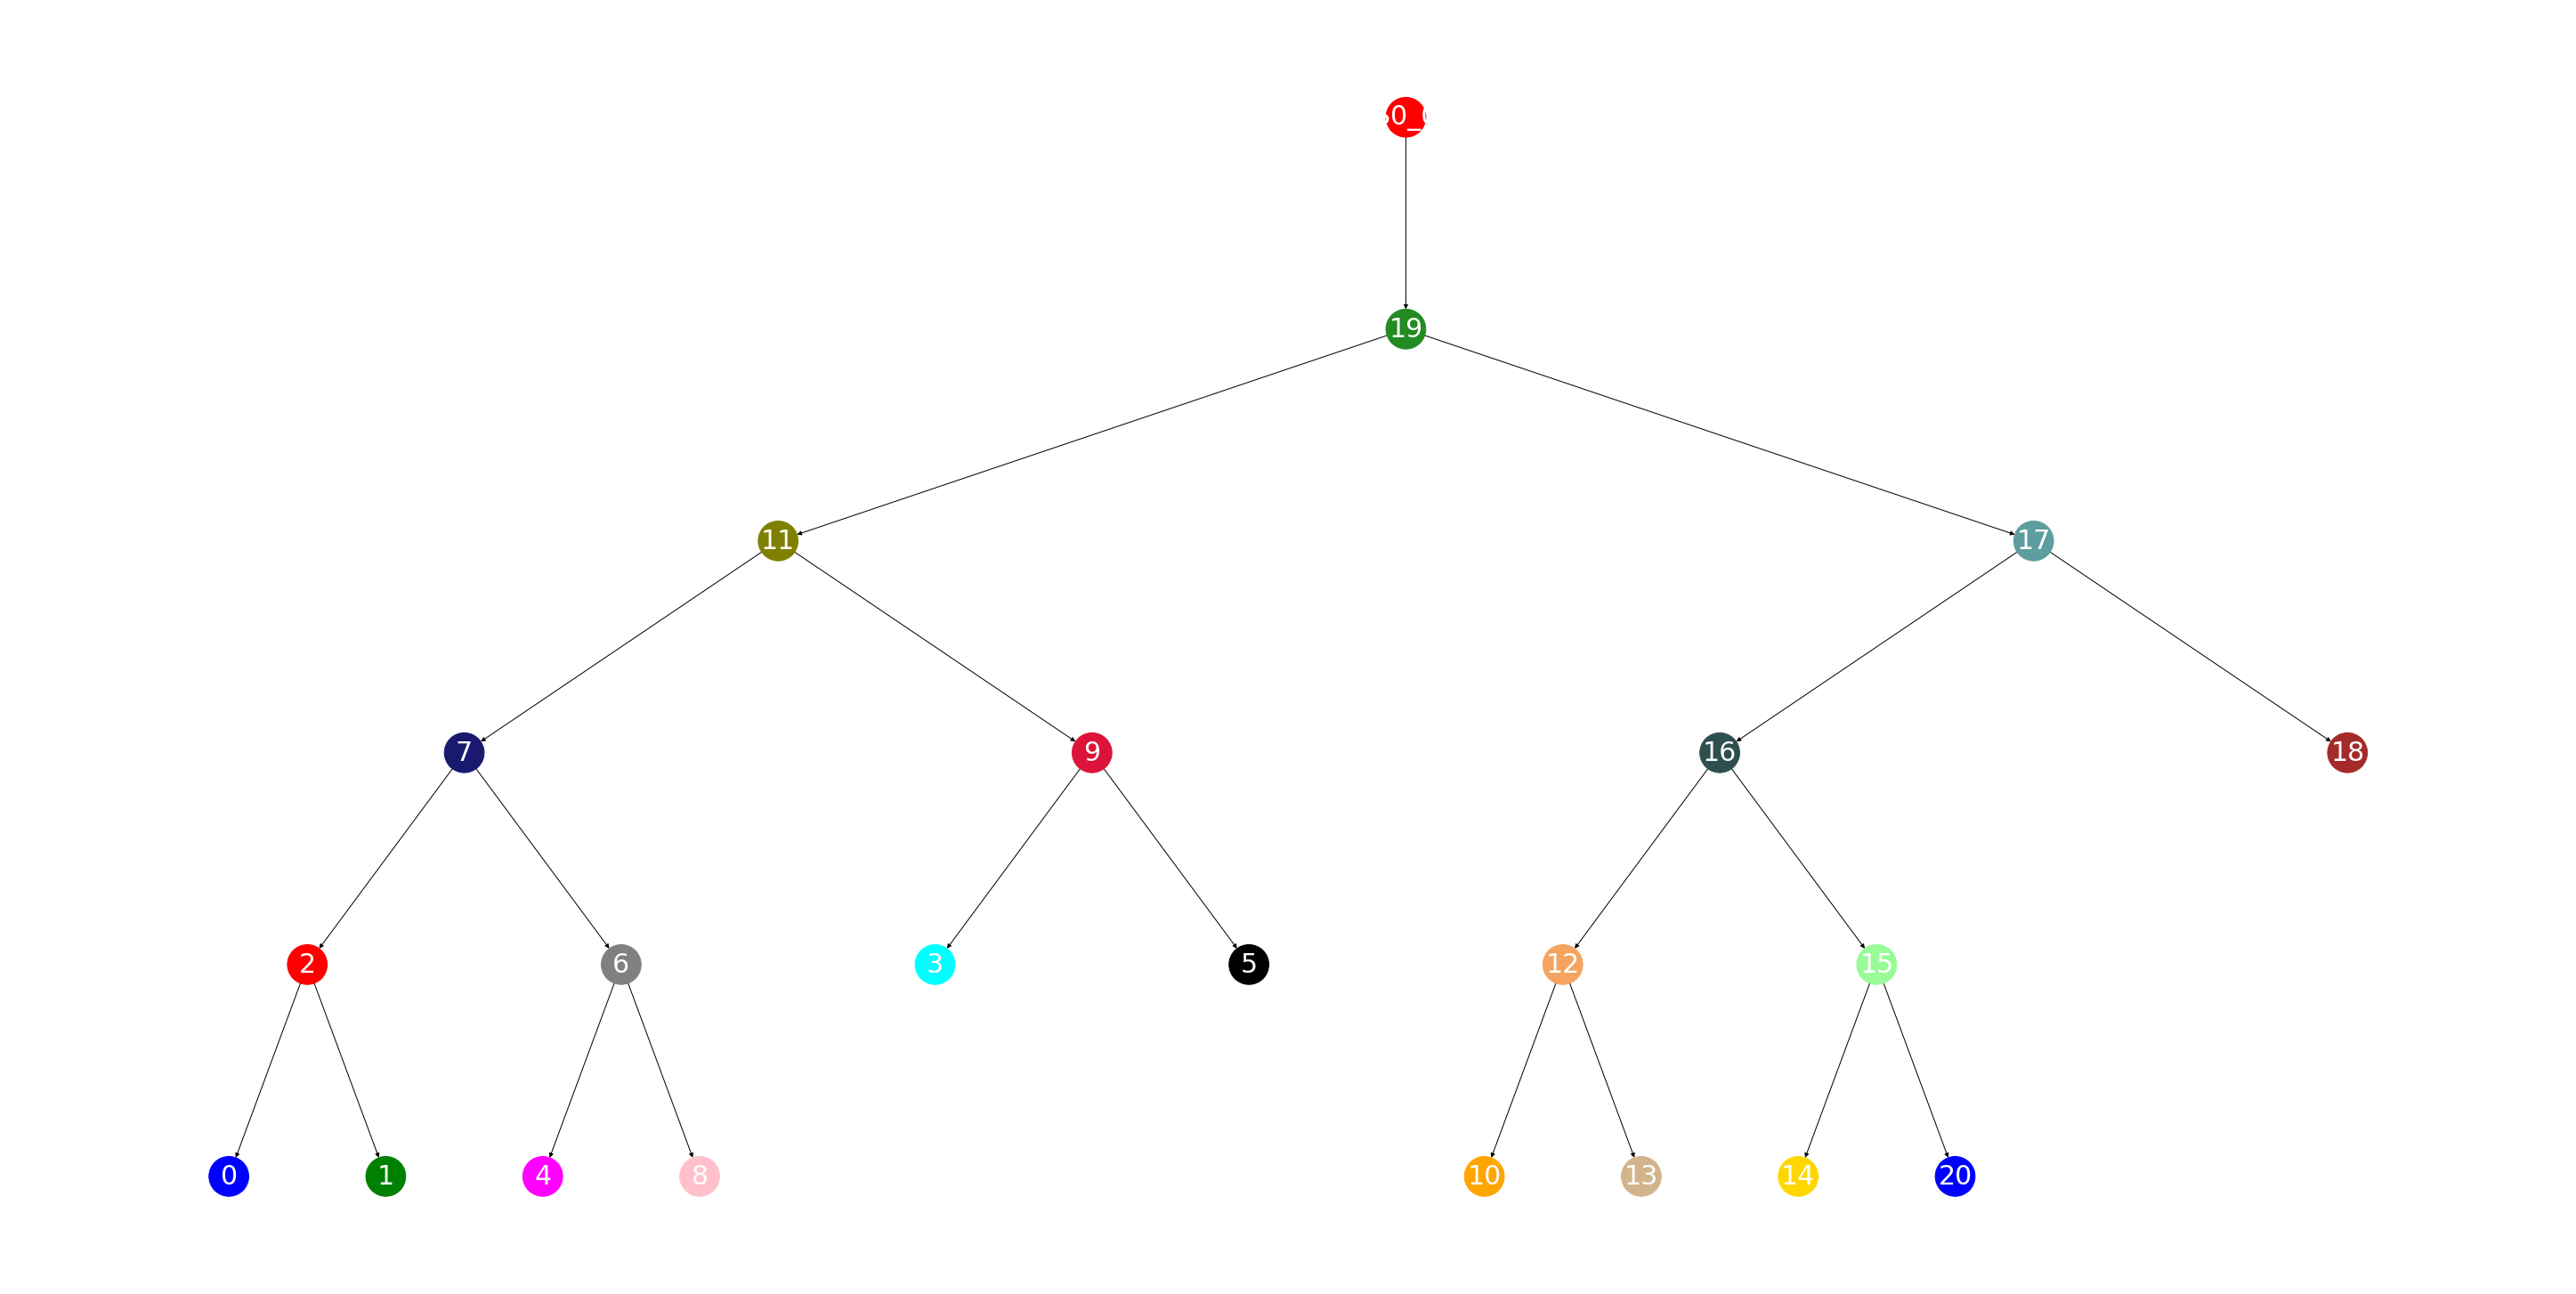

In [115]:
nviz.plot_limb_concept_network_2D(neuron_inh,
                                 node_colors=ret_col_inh)